C:\Users\micha\AppData\Local\Temp\ipykernel_53756\2865860091.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  metadata_df['img_id'] = metadata_df['img_id'].str.replace('.png', '')


         image_path  color_score  symmetry_score  blue_white_score  \
0  PAT_1042_187_746            1               2                 0   
1   PAT_106_158_249            2               2                 0   
2   PAT_108_161_423            2               3                 0   
3   PAT_109_868_723            2               2                 0   
4  PAT_1122_479_664            2               4                 0   

   diagnostic   age  
0           0  40.0  
1           0  71.0  
2           0  68.0  
3           1  82.0  
4           0  72.0  


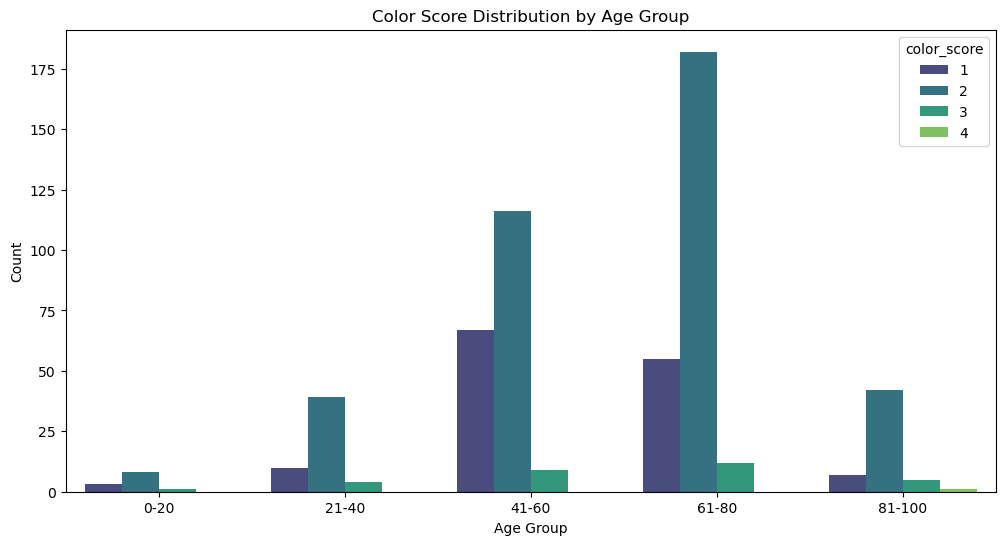

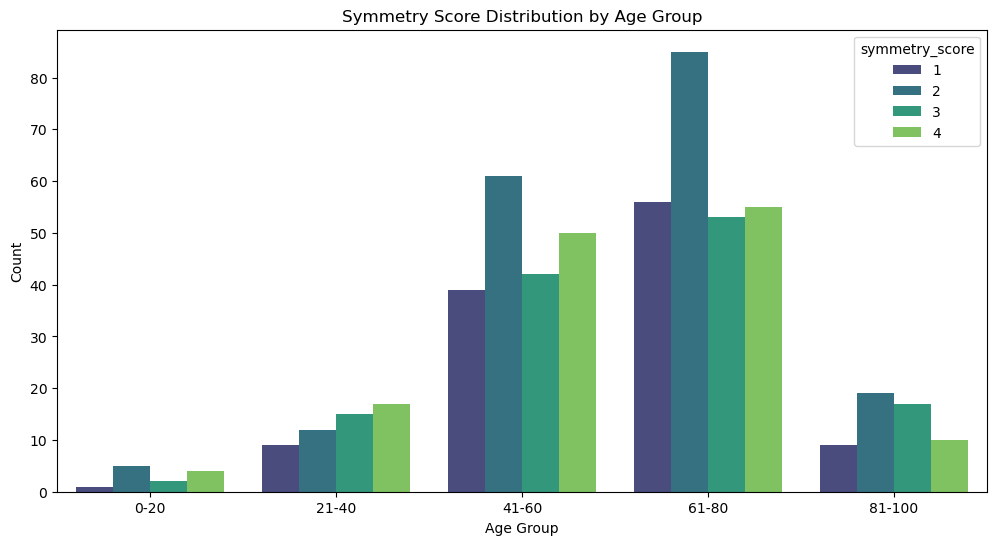

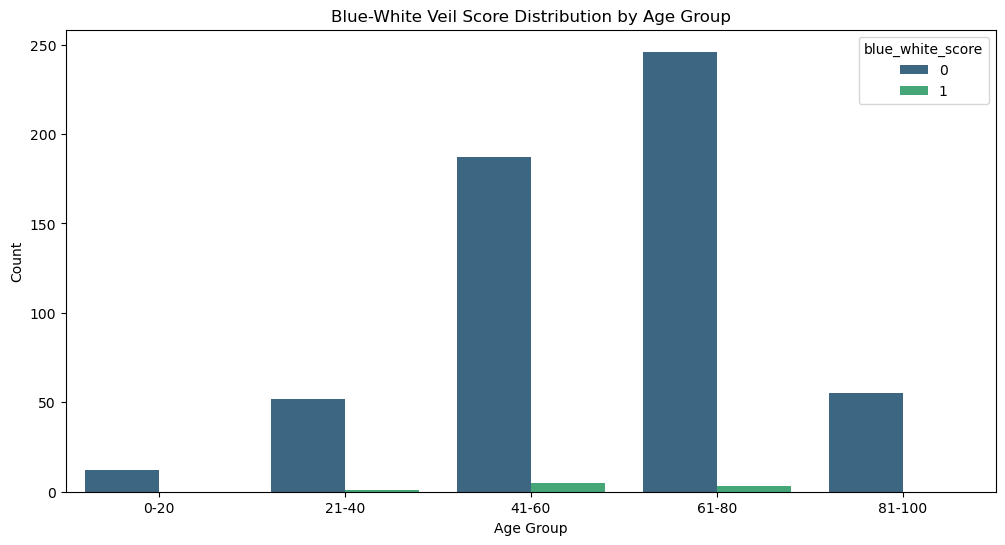

         image_path  color_score  symmetry_score  blue_white_score  \
0  PAT_1042_187_746            1               2                 0   
1   PAT_106_158_249            2               2                 0   
2   PAT_108_161_423            2               3                 0   
3   PAT_109_868_723            2               2                 0   
4  PAT_1122_479_664            2               4                 0   

   diagnostic   age age_group  
0           0  40.0     21-40  
1           0  71.0     61-80  
2           0  68.0     61-80  
3           1  82.0    81-100  
4           0  72.0     61-80  


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

results_df = pd.read_csv('for_classifier_openq.csv')
metadata_df = pd.read_csv('metadata.csv')

# Remove ".png" suffix from the 'img_id' column in metadata_df
metadata_df['img_id'] = metadata_df['img_id'].str.replace('.png', '')

# Ensure the columns to merge on are of the same data type
results_df['image_path'] = results_df['image_path'].astype(str)
metadata_df['img_id'] = metadata_df['img_id'].astype(str)

merged_df = pd.merge(results_df, metadata_df[['img_id', 'age']], how='left', left_on='image_path', right_on='img_id')
merged_df.drop(columns=['img_id'], inplace=True)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_results.csv', index=False)

print(merged_df.head())

# Create age groups
merged_df['age_group'] = pd.cut(merged_df['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])


def create_countplot(data, feature, title, filename):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='age_group', hue=feature, data=data, palette='viridis')
    plt.title(title)
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.legend(title=feature)
    plt.savefig(f'{filename}')
    plt.show()

# Create count plots for color_score, symmetry_score, and blue_white_score
create_countplot(merged_df, 'color_score', 'Color Score Distribution by Age Group', 'color_score_distribution_by_age_group.png')
create_countplot(merged_df, 'symmetry_score', 'Symmetry Score Distribution by Age Group', 'symmetry_score_distribution_by_age_group.png')
create_countplot(merged_df, 'blue_white_score', 'Blue-White Veil Score Distribution by Age Group', 'blue_white_score_distribution_by_age_group.png')

# Print the merged DataFrame to verify the addition of new columns
print(merged_df.head())


In [8]:
from scipy.stats import f_oneway


anova_color = f_oneway(
    merged_df[merged_df['age_group'] == '0-20']['color_score'],
    merged_df[merged_df['age_group'] == '21-40']['color_score'],
    merged_df[merged_df['age_group'] == '41-60']['color_score'],
    merged_df[merged_df['age_group'] == '61-80']['color_score'],
    merged_df[merged_df['age_group'] == '81-100']['color_score']
)

anova_symmetry = f_oneway(
    merged_df[merged_df['age_group'] == '0-20']['symmetry_score'],
    merged_df[merged_df['age_group'] == '21-40']['symmetry_score'],
    merged_df[merged_df['age_group'] == '41-60']['symmetry_score'],
    merged_df[merged_df['age_group'] == '61-80']['symmetry_score'],
    merged_df[merged_df['age_group'] == '81-100']['symmetry_score']
)

anova_blue_white = f_oneway(
    merged_df[merged_df['age_group'] == '0-20']['blue_white_score'],
    merged_df[merged_df['age_group'] == '21-40']['blue_white_score'],
    merged_df[merged_df['age_group'] == '41-60']['blue_white_score'],
    merged_df[merged_df['age_group'] == '61-80']['blue_white_score'],
    merged_df[merged_df['age_group'] == '81-100']['blue_white_score']
)

print(f"ANOVA results for Color Score by Age Group: {anova_color}")
print(f"ANOVA results for Symmetry Score by Age Group: {anova_symmetry}")
print(f"ANOVA results for Blue-White Veil Score by Age Group: {anova_blue_white}")

# Save ANOVA results to a text file
with open('anova_results.txt', 'w') as f:
    f.write("ANOVA Analysis Results\n")
    f.write("====================\n\n")
    
    f.write("Color Score by Age Group:\n")
    f.write(str(anova_color) + "\n\n")
    
    f.write("Symmetry Score by Age Group:\n")
    f.write(str(anova_symmetry) + "\n\n")
    
    f.write("Blue-White Veil Score by Age Group:\n")
    f.write(str(anova_blue_white) + "\n\n")


ANOVA results for Color Score by Age Group: F_onewayResult(statistic=4.39973433098453, pvalue=0.0016471895982433599)
ANOVA results for Symmetry Score by Age Group: F_onewayResult(statistic=1.2273203037165255, pvalue=0.2980818938012914)
ANOVA results for Blue-White Veil Score by Age Group: F_onewayResult(statistic=0.6439387086435857, pvalue=0.631360609022984)
